<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Student_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Student Performance Dataset
#Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
#Objective: Identify key factors influencing student academic performance.

#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male    

In [2]:
#2. Understand the Structure

# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [3]:
#3. Handle Missing Values
#If there are missing values:

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

In [5]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#One-Hot Encoding :

import pandas as pd

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Verify column names
print("Column names in the dataset:")
print(data.columns)

# Perform one-hot encoding for categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print("\nEncoded dataset:")
print(data_encoded.head())

# Optional: Save the encoded dataset to a new CSV file
data_encoded.to_csv("encoded_student_performance_data.csv", index=False)

Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Encoded dataset:
   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   

In [9]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print(data_encoded.head())

# Rename columns for consistency
data = data.rename(columns={
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course'
})

# Perform one-hot encoding for categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print(data_encoded.head())

   math score  reading score  writing score  gender_1  race/ethnicity_group B  \
0          72             72             74     False                    True   
1          69             90             88     False                   False   
2          90             95             93     False                    True   
3          47             57             44      True                   False   
4          76             78             75      True                   False   

   race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False                   False   
1                    True                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                    True                   False                   False   

   parental level of education_bachelor's degree  

In [10]:
#Label Encoding :
#For ordinal categorical variables:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to ordinal categorical columns
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['lunch'] = label_encoder.fit_transform(data['lunch'])
data['test_preparation_course'] = label_encoder.fit_transform(data['test_preparation_course'])

# Display updated dataset
print(data.head())

   gender race/ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


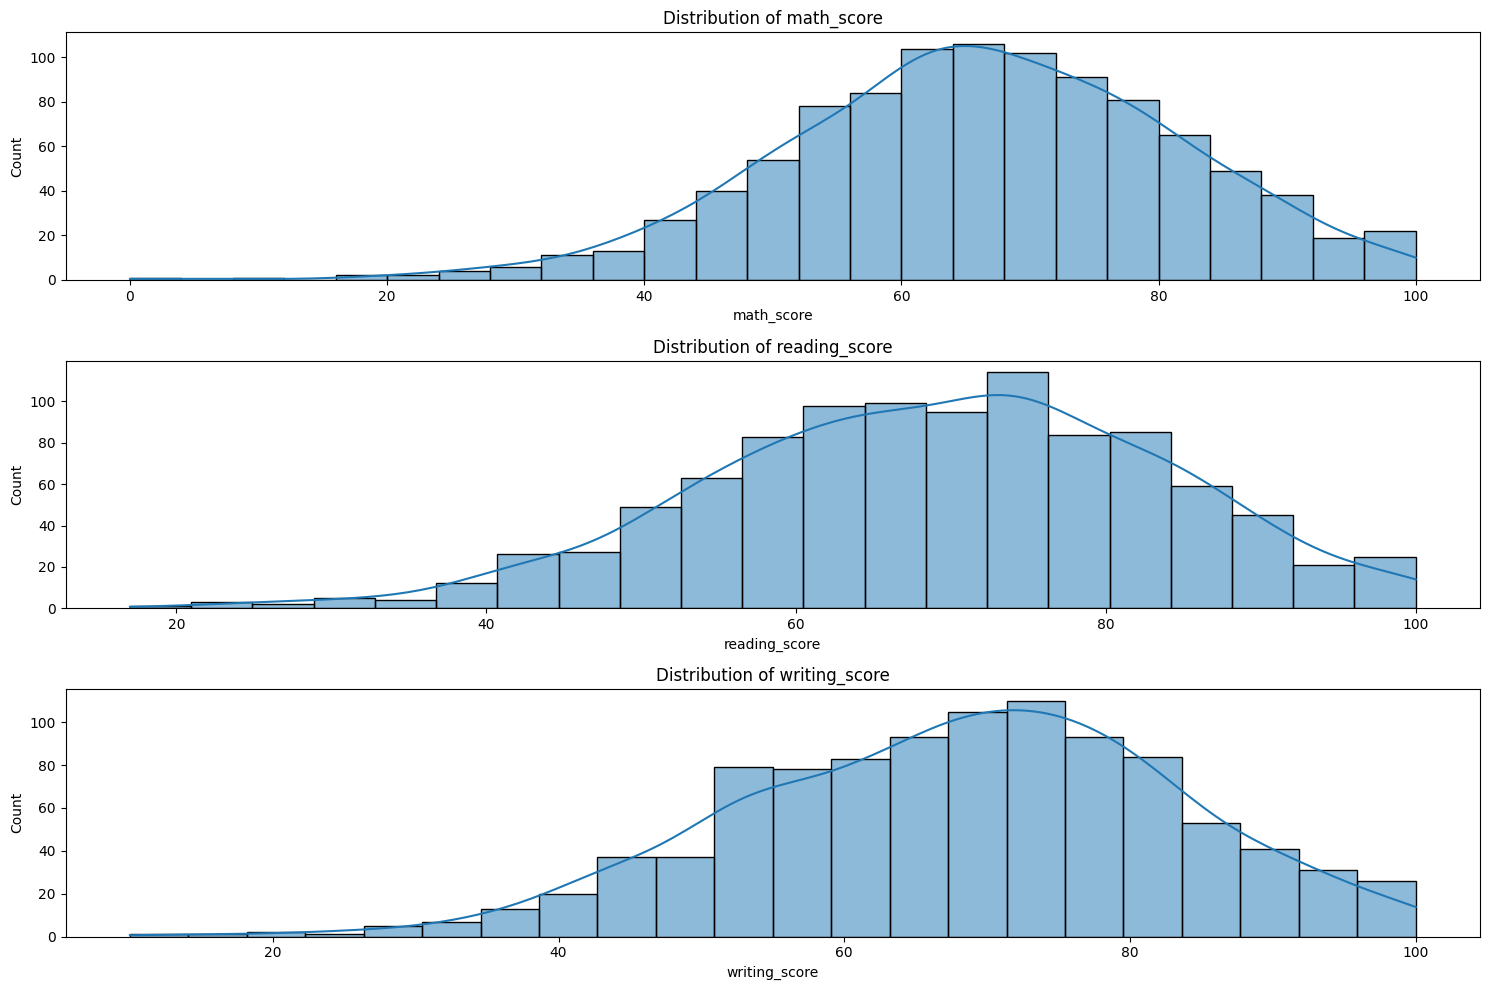

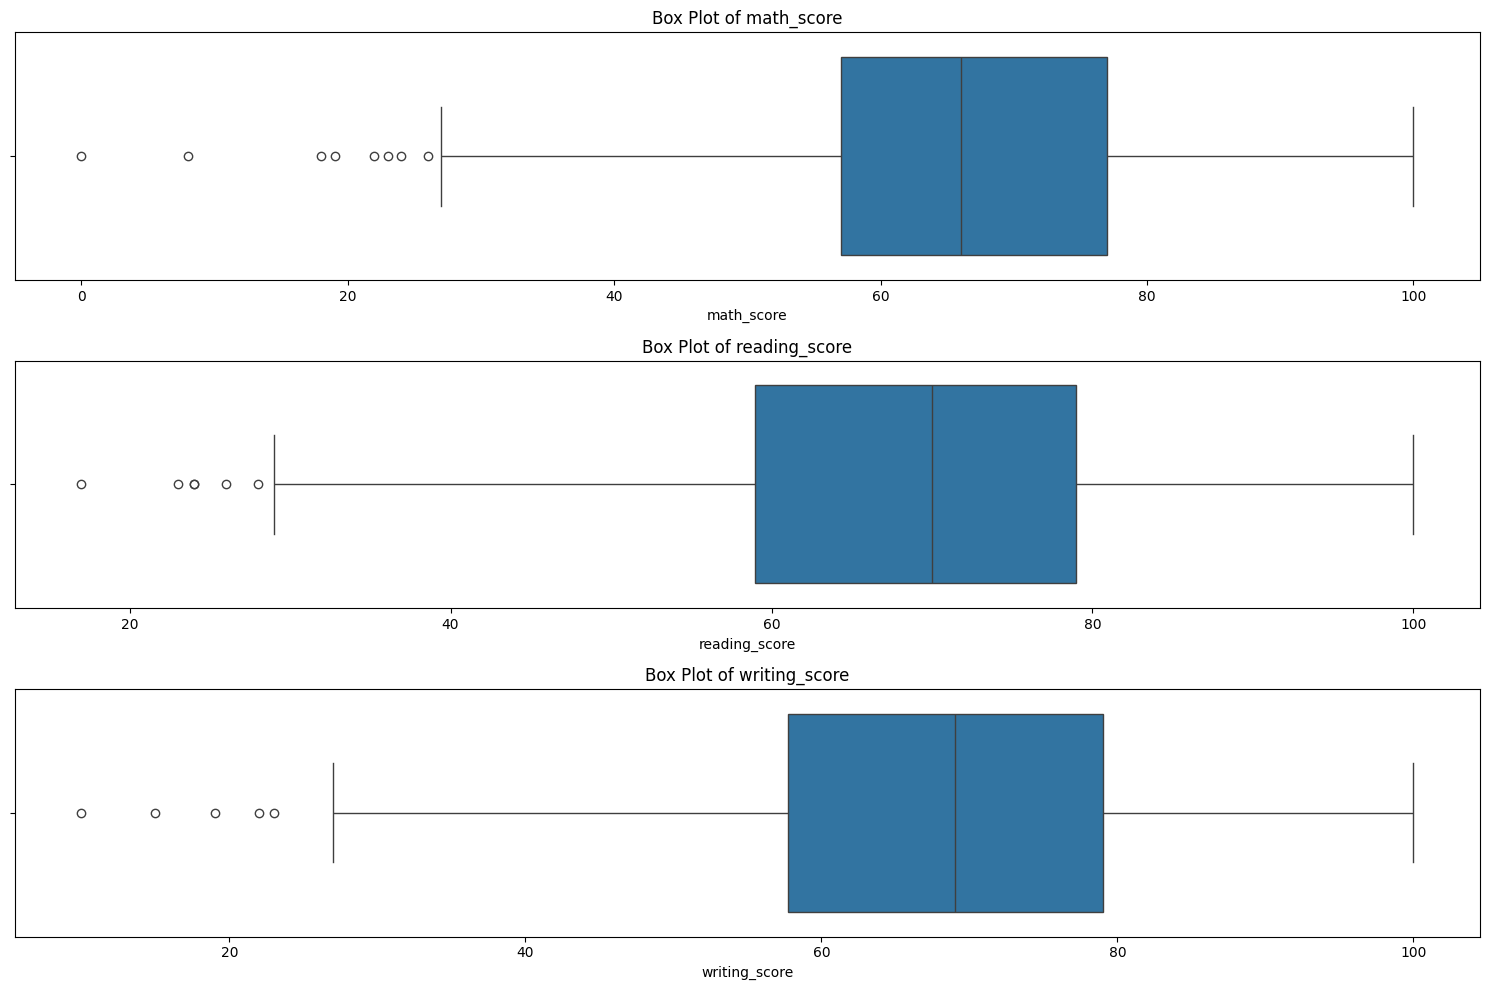

In [12]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns for consistency
data = data.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(3, 1, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

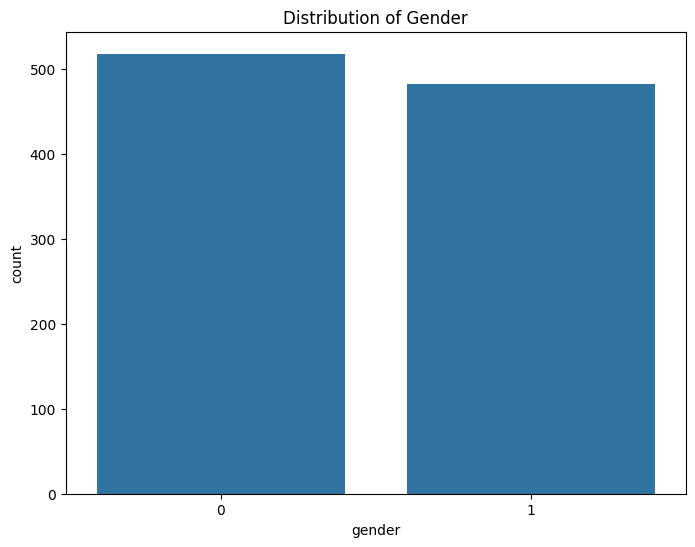

In [13]:
# Categorical Columns :
# Bar plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()


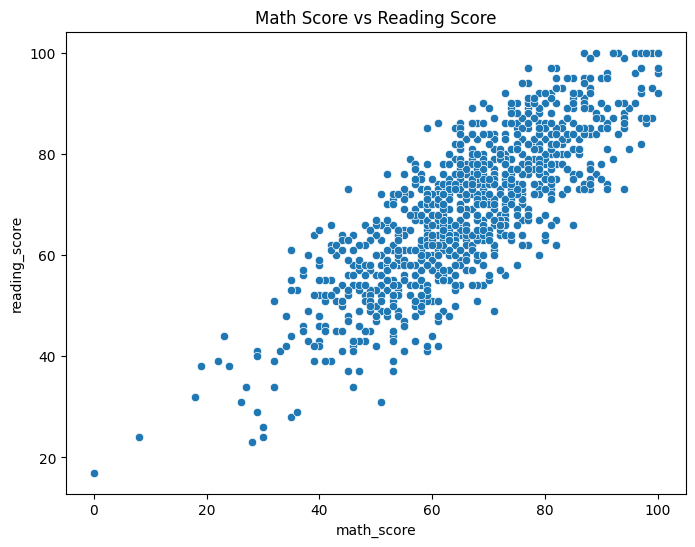

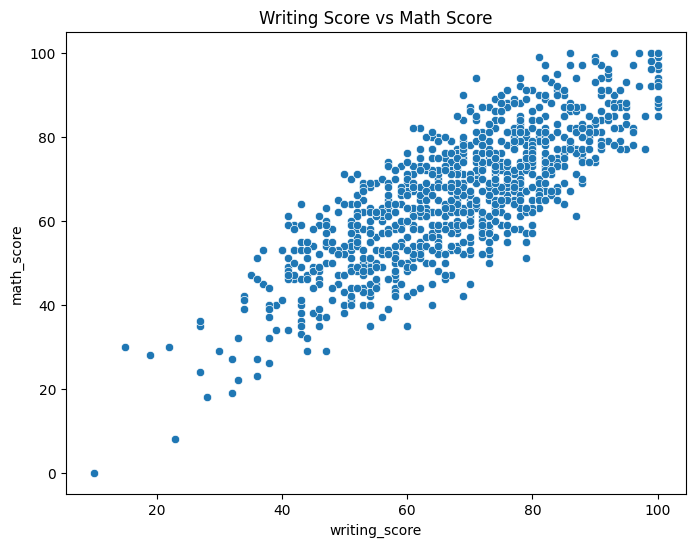

In [14]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot: Math Score vs Reading Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math_score', y='reading_score', data=data)
plt.title('Math Score vs Reading Score')
plt.show()

# Scatter plot: Writing Score vs Math Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='writing_score', y='math_score', data=data)
plt.title('Writing Score vs Math Score')
plt.show()

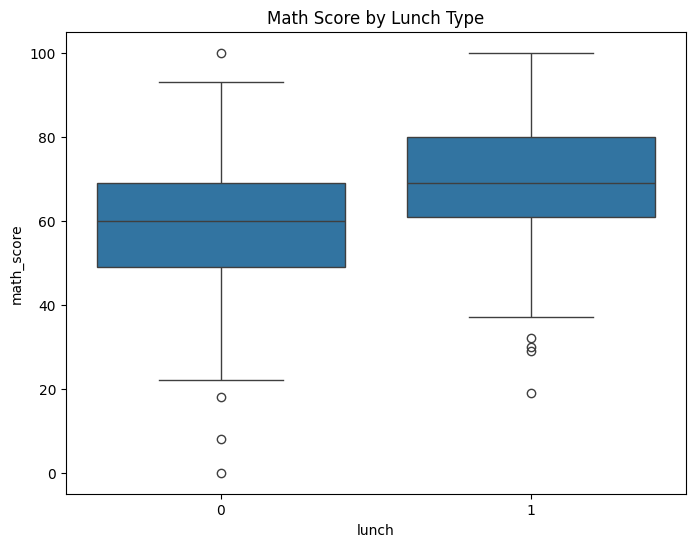

In [15]:
#Box Plots :
# Box plot: Lunch Type vs Math Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='math_score', data=data)
plt.title('Math Score by Lunch Type')
plt.show()

Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data types of columns:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


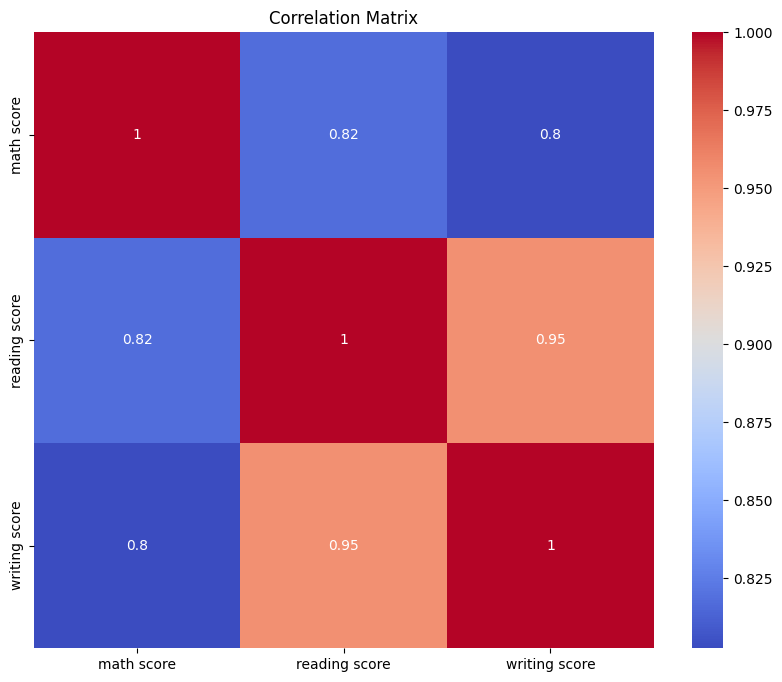

In [17]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

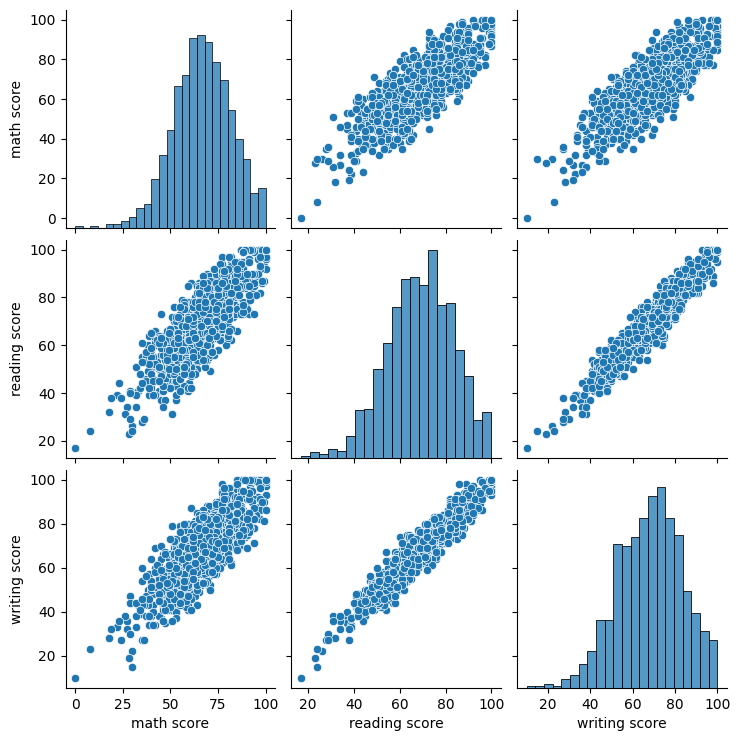

In [18]:
#Pair Plot :
# Pair plot for all variables
sns.pairplot(data)
plt.show()

In [20]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.
import pandas as pd

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Detect outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data types of columns:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
Original shape: (1000, 8)
Cleaned shape: (988, 8)


In [22]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display scaled data
print("\nScaled dataset:")
print(scaled_data.head())

Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data types of columns:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Scaled dataset:
   math score  reading score  writing score
0    0.390024       0.193999       0.391492
1    0.192076       1.427476       1.313269
2    1.577711       1.770109       1.642475
3   -1.259543      -0.833899      -1.583744
4    0.653954       0.605158       0.457333


Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data types of columns:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Correlation with scores:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


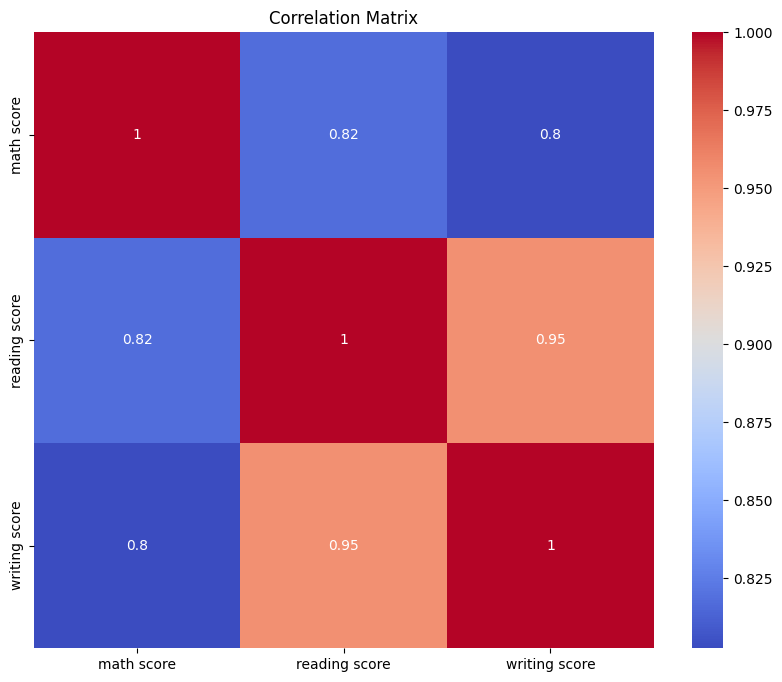

In [25]:
#Step 4: Feature Selection
#1. Correlation Analysis
#Identify features that are strongly correlated with math_score, reading_score, and writing_score.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation with scores
print("\nCorrelation with scores:")
print(correlation_matrix[['math score', 'reading score', 'writing score']].sort_values(by='math score', ascending=False))

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
#2. Model-Based Feature Importance
#Use a Random Forest model to rank feature importance.
import pandas as pd

# Load the dataset
data_cleaned = pd.read_csv("StudentsPerformance.csv")

# Verify column names
print("Column names in the dataset:")
print(data_cleaned.columns)

# Rename columns for consistency (if needed)
data_cleaned = data_cleaned.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

# Split data into features (X) and target (y)
X = data_cleaned.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = data_cleaned[['math_score', 'reading_score', 'writing_score']]

# Display shapes of X and y
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

Column names in the dataset:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Shape of X: (1000, 5)
Shape of y: (1000, 3)


In [28]:
"""
Step 5: Summary of Insights
Key Findings
Strong Correlations :
math_score, reading_score, and writing_score are highly correlated with each other.
Students who completed a test preparation course tend to perform better across all subjects.
Categorical Variables :
Female students tend to perform better in reading and writing, while male students perform slightly better in math.
Students receiving a standard lunch tend to score higher than those receiving free/reduced lunch.
Outliers :
Some students have unusually low scores in one or more subjects, which may need further investigation.
Recommendations
Focus on test_preparation_course, lunch, and parental_level_of_education as key predictors for academic performance.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

'\nStep 5: Summary of Insights\nKey Findings\nStrong Correlations :\nmath_score, reading_score, and writing_score are highly correlated with each other.\nStudents who completed a test preparation course tend to perform better across all subjects.\nCategorical Variables :\nFemale students tend to perform better in reading and writing, while male students perform slightly better in math.\nStudents receiving a standard lunch tend to score higher than those receiving free/reduced lunch.\nOutliers :\nSome students have unusually low scores in one or more subjects, which may need further investigation.\nRecommendations\nFocus on test_preparation_course, lunch, and parental_level_of_education as key predictors for academic performance.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact.\n'